# **VIKRAM SAINI**

# **Stores sales prediction using machine learning algorithms**

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix,precision_score
import seaborn as sns
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

### Import Dataset

In [2]:
df1_train = pd.read_csv("C:/Users/Amit Kumar Saini/Desktop/iNeuron Internship/Train.csv")
df1_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [3]:
df1_test = pd.read_csv("C:/Users/Amit Kumar Saini/Desktop/iNeuron Internship/Test.csv")
df1_test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


###### Shape of dataset

In [4]:
df1_train.shape

(8523, 12)

In [5]:
df1_test.shape

(5681, 11)

###### Combine the train and test dataset

In [6]:
df = df1_train.append(df1_test)
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [7]:
df.shape

(14204, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


######  Extract numeric and categorical columns from dataset

In [9]:
numerics = ['int16', 'int32', 'int64', 'float64']
df.select_dtypes(include=numerics)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
5676,10.50,0.013496,141.3154,1997,NaN
5677,7.60,0.142991,169.1448,2009,NaN
5678,10.00,0.073529,118.7440,2002,NaN
5679,15.30,0.000000,214.6218,2007,NaN


In [10]:
# Extract categorical columns from dataset
#categorical = ['object']
#df_train.select_dtypes(include=categorical)

cat_col = []
for x in df.dtypes.index:
  if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
df.nunique() #Check unique values 

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

### Data Pre-processing

###### Handling Missing Values

In [12]:
df.isnull().sum() #Checking missing values for train dataset

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Item_Outlet_Sales            0.399958
Outlet_Size                  0.282737
Item_Weight                  0.171712
Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
dtype: float64


<AxesSubplot:>

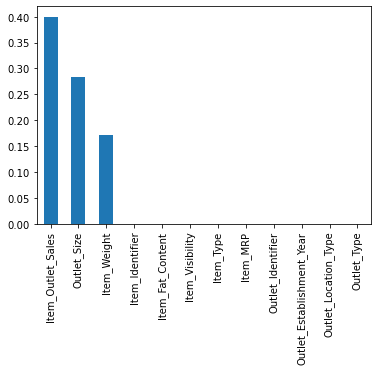

In [13]:
#df.isnull().sum().sort_values(ascending=False)

#Checking missing values using heatmap
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

missing_percentages = df.isnull().sum().sort_values(ascending=False)/len(df)
print(missing_percentages)
missing_percentages.plot(kind = 'bar')

<AxesSubplot:>

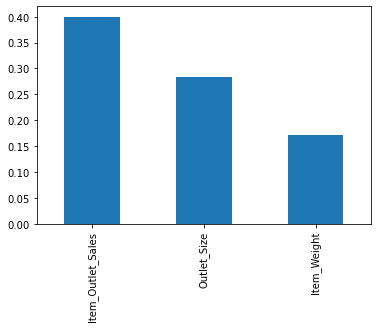

In [14]:
missing_percentages[missing_percentages !=0].plot(kind='bar')

In [15]:
# mean value of "Item_Weight" column
df['Item_Weight'].mean()
# filling the missing values in "Item_weight column" with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [16]:
# mode of "Outlet_Size" column
df['Outlet_Size'].mode()
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_size)
miss_values = df['Outlet_Size'].isnull()
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])
# checking for missing values
df.isnull().sum()

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [17]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [18]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',}},inplace=True)
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

###  Exploratory Data Analysis(EDA)

##### Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

###### Statistical Summary

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

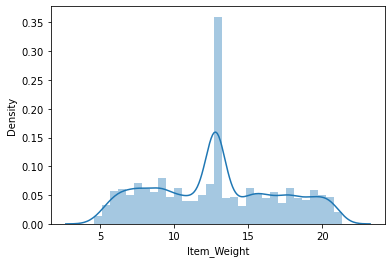

In [20]:
sns.distplot(df["Item_Weight"])

Here we see that the item weight maximum lie between 5 to 20.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

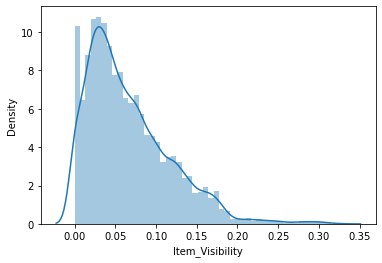

In [21]:
sns.distplot(df["Item_Visibility"])

In [22]:
sum(df['Item_Visibility']==0)
df.loc[:,"Item_Visibility"].replace([0],[df['Item_Visibility'].mean()],inplace=True)

Graph show that item visibility is negatively skewned. 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

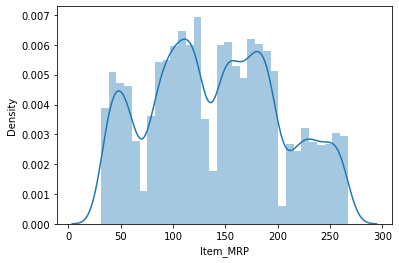

In [23]:
sns.distplot(df["Item_MRP"])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

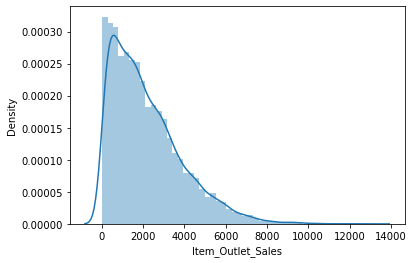

In [24]:
sns.distplot(df.Item_Outlet_Sales)

###### 1. Find top five itme type which buy a customer? [Top 5]

([<matplotlib.patches.Wedge at 0x2cbe09d5c70>,
 [Text(0.7823227802156149, 0.7732858899241024, 'Fruits and Vegetables'),
  Text(-0.7567572827092803, 0.7983222501386684, 'Snack Foods'),
  Text(-0.9333342133607432, -0.5821402289571499, 'Household'),
  Text(0.15202155416855107, -1.089444558969468, 'Frozen Foods'),
  Text(0.9952516688406603, -0.468480645992853, 'Dairy')],
 [Text(0.4267215164812444, 0.4217923035949649, '24.82%'),
  Text(-0.4127766996596074, 0.4354485000756373, '24.52%'),
  Text(-0.5090913891058598, -0.3175310339766272, '19.08%'),
  Text(0.08292084772830056, -0.5942424867106189, '17.58%'),
  Text(0.5428645466403601, -0.25553489781428346, '14.00%')])

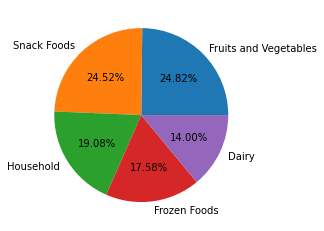

In [25]:
Item_Type_name = df.Item_Type.value_counts().index
Item_Type_Value = df.Item_Type.value_counts().values
plt.pie(Item_Type_Value[:5],labels =Item_Type_name[:5],autopct='%1.2f%%')

Observation - 
The Customers buys fruits and vegetables the most.

In [26]:
# plt.rcParams['figure.figsize'] = (12,5) ,f = list(df.Item_Type.unique())
# x = sns.countplot(df.Item_Type) ,x.set_xticklabels(labels=f,rotation=90)

###### 2. Find maximum outet type

([<matplotlib.patches.Wedge at 0x2cbe0a29a30>,
 [Text(-0.5126532399361523, 0.9732351491715484, 'Supermarket Type1'),
  Text(-0.22062100144425675, -1.0776485390523822, 'Grocery Store'),
  Text(0.5675334210831567, -0.9422875441995656, 'Supermarket Type3'),
  Text(1.0363169201459532, -0.36884582283009004, 'Supermarket Type2')],
 [Text(-0.27962903996517396, 0.5308555359117536, '65.43%'),
  Text(-0.12033872806050366, -0.587808294028572, '12.71%'),
  Text(0.30956368422717634, -0.513975024108854, '10.98%'),
  Text(0.5652637746250653, -0.20118863063459455, '10.88%')])

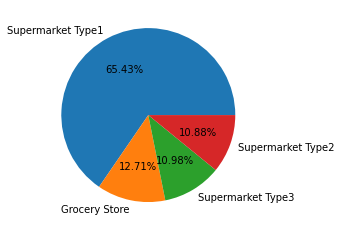

In [27]:
Outlet_Type_name = df.Outlet_Type.value_counts().index
Outlet_Type_value = df.Outlet_Type.value_counts().values
plt.pie(Outlet_Type_value,labels=Outlet_Type_name,autopct='%1.2f%%')

Maximum outlet are Supermarket type1 and minimum are supermarket type2.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

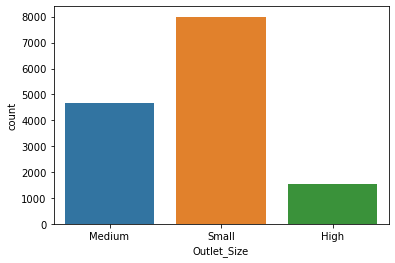

In [28]:
sns.countplot(df.Outlet_Size)

Maximum outlet size is medium.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

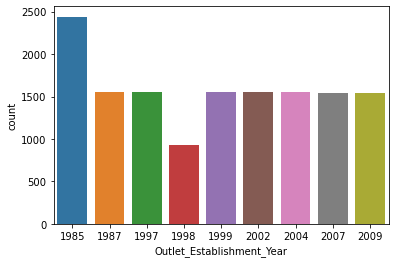

In [29]:
sns.countplot(df.Outlet_Establishment_Year)

In year 1985 maximum outlet establish and in 1998 minimum.

### Label Encoding

#### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

In [30]:
df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [31]:
label_encoder = LabelEncoder()
df['Item_Fat_Content'] = label_encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = label_encoder.fit_transform(df['Item_Type'])
df['Outlet_Size'] = label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = label_encoder.fit_transform(df['Outlet_Type'])

In [32]:
#df_train=pd.get_dummies(df_train, columns=['Item_Fat_Content','Item_Type','Outlet_Identifier'])

In [33]:
df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700


In [34]:
#sns.distplot(df.Item_Weight)

In [35]:
df_test=df[df['Item_Outlet_Sales'].isnull()]
df_test.head()
f = df_test.dropna(axis=1)
f.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1,0,1
1,8.300000,1,0.038428,4,87.3198,2,1,1
2,14.600000,0,0.099575,11,241.7538,2,2,0
3,7.315000,0,0.015388,13,155.0340,2,1,1
4,12.792854,1,0.118599,4,234.2300,1,2,3


In [36]:
df_train=df[~df['Item_Outlet_Sales'].isnull()]
df_train.head()
df_train.shape

(8523, 9)

In [37]:
x = df_train.iloc[:,:-1]
Y = df_train.iloc[:,-1] 

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=2)

In [39]:
#st_x= StandardScaler()    
#X_train= st_x.fit_transform(X_train)    
#X_test= st_x.transform(X_test)    

### 1. Multiple Linear Regression Model

In [40]:
#Training the Multiple Linear Regression on training set
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [41]:
#Predicting the Test set results
Pre_Item_Outlet_Sales_test = reg.predict(X_test)
Pre_Item_Outlet_Sales_test

array([2557.79502803, 3491.63200283, 1033.21069632, ..., 2226.63880673,
       4494.96265026, 3340.29603692])

In [42]:
Pre_Item_Outlet_Sales_train = reg.predict(X_train)
Pre_Item_Outlet_Sales_train

array([2433.57692098, 3000.66398942, 3971.85755352, ..., 2583.66463773,
       2110.55617942, 3105.75765468])

In [43]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(Y_test,Pre_Item_Outlet_Sales_test)
print('R^2 value = ', r2_sales)

R^2 value =  0.4870428508645147


In [44]:
r2_sales = metrics.r2_score(Y_train,Pre_Item_Outlet_Sales_train)
print('R^2 value = ', r2_sales)

R^2 value =  0.505143550207401


### Multiple Linear Regression
Training Dataset - R_squared_value = 0.505143550207401

  Test Dataset - R_squared_value = 0.4870428508645147

### 2. Random Forest Regression

In [45]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train,Y_train) 

RandomForestRegressor(random_state=0)

In [46]:
Pre_Item_Outlet_Sales_train = regressor.predict(X_train)
Pre_Item_Outlet_Sales_train

array([1905.15341 , 2833.465034, 3103.167298, ..., 2656.728424,
       1691.53148 , 2170.64116 ])

In [47]:
r2_sales = metrics.r2_score(Y_train,Pre_Item_Outlet_Sales_train)
print('R_squared_value = ', r2_sales)

R_squared_value =  0.935819613148664


In [48]:
Pre_Item_Outlet_Sales_test = regressor.predict(X_test)
Pre_Item_Outlet_Sales_test

array([2451.622076, 2158.270596, 1747.531918, ..., 2870.110666,
       3262.413342, 3295.283888])

In [49]:
r2_sales = metrics.r2_score(Y_test,Pre_Item_Outlet_Sales_test)
print('R_squared_value = ', r2_sales)

R_squared_value =  0.5354147889262313


### Random Forest Regression
Training Dataset - R_squared_value = 0.935819613148664

Test Dataset     - R_squared_value = 0.5354147889262313

### Item_Outlet_Sales for given test dataset

In [50]:
Item_Outlet_Sales = regressor.predict(f)
f['Item_Outlet_Sales'] = Item_Outlet_Sales
f

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,20.750000,0,0.007565,13,107.8622,1,0,1,1728.296956
1,8.300000,1,0.038428,4,87.3198,2,1,1,1466.424500
2,14.600000,0,0.099575,11,241.7538,2,2,0,581.276690
3,7.315000,0,0.015388,13,155.0340,2,1,1,2085.924768
4,12.792854,1,0.118599,4,234.2300,1,2,3,5956.426566
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,2,0,1,1828.493198
5677,7.600000,1,0.142991,15,169.1448,1,2,2,2468.739794
5678,10.000000,0,0.073529,8,118.7440,2,1,1,2099.740118
5679,15.300000,1,0.065953,3,214.6218,2,1,1,3280.050384


### 3. XGBoost

In [51]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [52]:
Pre_Item_Outlet_Sales_train = xgb.predict(X_train)
Pre_Item_Outlet_Sales_train

array([2230.9854, 2748.041 , 3041.645 , ..., 3123.5957, 1917.6934,
       2216.991 ], dtype=float32)

In [53]:
r2_sales = metrics.r2_score(Y_train,Pre_Item_Outlet_Sales_train)
print('R_squared_value = ', r2_sales)

R_squared_value =  0.847608874947968


In [54]:
r2_sales = metrics.r2_score(Y_test,Pre_Item_Outlet_Sales_test)
print('R_squared_value = ', r2_sales)

R_squared_value =  0.5354147889262313


### XGBoost
Training Dataset - R_squared_value = 0.847608874947968

Test Dataset     - R_squared_value = 0.5354147889262313

**Random Forest Regression gives better result compare to other ML algorithms.** 